<a href="https://colab.research.google.com/github/tommymmcguire/DeerAI-540/blob/main/grounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import os

HOME = os.getcwd()
print(HOME)

%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content
/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 430 (delta 148), reused 131 (delta 127), pack-reused 233
Receiving objects: 100% (430/430), 12.86 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (220/220), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 14.8 MB/s eta 0:00:00
/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content
/content/weights
/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate
from groundingdino.util.inference import Model

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)


/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content/weights/groundingdino_swint_ogc.pth ; exist: True
final text_encoder_type: bert-base-uncased


In [ ]:
import torch
from torchvision.ops import box_convert
import numpy as np
from PIL import Image
import supervision as sv

In [ ]:
TEXT_PROMPT = "deer"
BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.25

def get_bounding_box(path):
  image_source, image = load_image(path)
  print(image_source)
  print(image)

  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

  %matplotlib inline
  sv.plot_image(annotated_frame, (16, 16))

  return boxes[0].numpy()

[[[ 83 102  80]
  [ 87 106  84]
  [ 91 111  86]
  ...
  [122 138 102]
  [119 137  99]
  [122 140 102]]

 [[ 86 105  83]
  [ 90 109  87]
  [ 94 112  88]
  ...
  [124 140 104]
  [130 148 110]
  [140 158 120]]

 [[ 91 109  85]
  [ 95 113  89]
  [ 98 116  90]
  ...
  [125 141 105]
  [139 155 118]
  [153 169 132]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 [[  0   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  0   2   0]
  [  0   2   0]
  [  0   2   0]]

 [[  0   2   0]
  [  0   2   0]
  [  0   2   0]
  ...
  [  0   3   0]
  [  0   3   0]
  [  0   3   0]]]
tensor([[[-0.4911, -0.4226, -0.5082,  ...,  0.2967,  0.1083,  0.2111],
         [-0.3198, -0.4054, -0.4911,  ..., -0.0458,  0.3138,  0.9988],
         [-0.4911, -0.3198, -0.1314,  ...,  0.3823,  1.0502,  1.2214],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
 

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


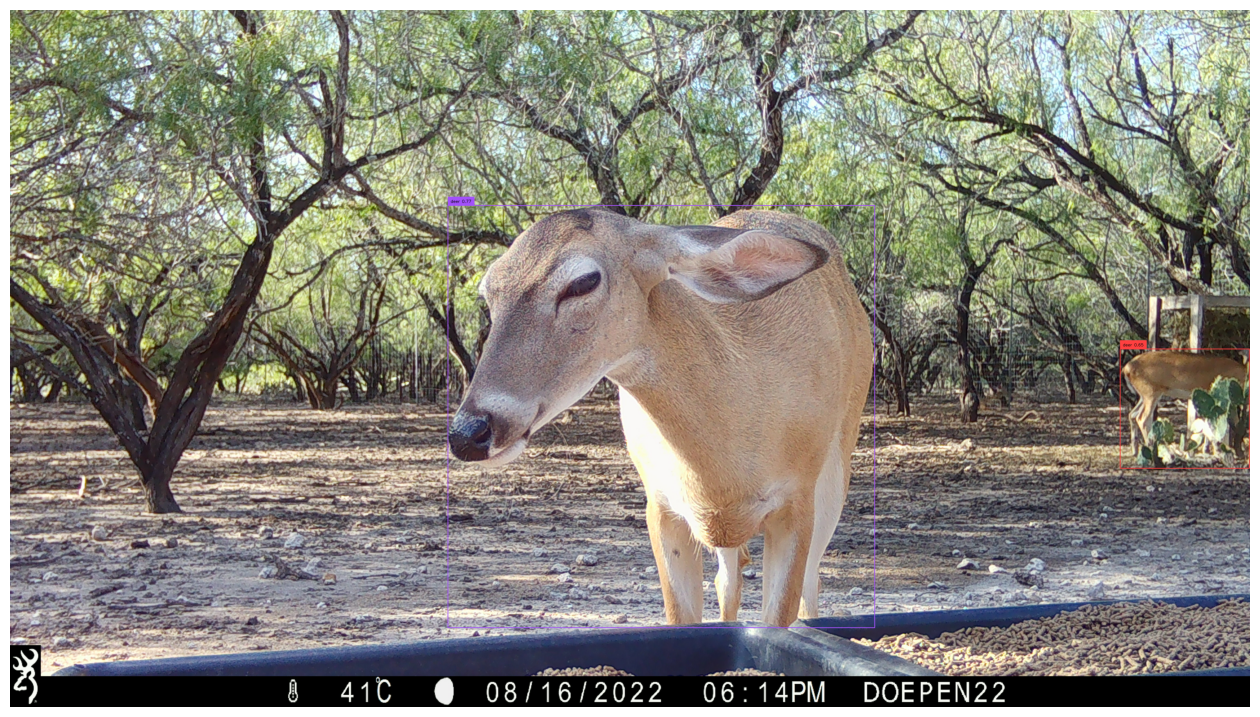

array([0.52525073, 0.58395123, 0.34412313, 0.60463196], dtype=float32)

In [ ]:
img_path = "../Doe 2003 (2737).JPG"
box = get_bounding_box(img_path)
box

In [ ]:
import os
import cv2  # For image operations like cropping and saving


'''
Code to loop through image directory, and save the new cropped image
'''


TEXT_PROMPT = "deer"
BOX_THRESHOLD = 0.25
TEXT_THRESHOLD = 0.25

def get_bounding_box(image):
    # Assuming 'predict' and 'annotate' functions are defined elsewhere and properly imported.
    boxes, logits, phrases = predict(
        model=model,
        image=image,
        caption=TEXT_PROMPT,
        box_threshold=BOX_THRESHOLD,
        text_threshold=TEXT_THRESHOLD
    )

    # Assuming you want to return all boxes, not just the first one.
    return boxes

def load_image(path):
    # Load your image from the given path. Adjust according to your image loading method.
    image = cv2.imread(path)
    if image is None:
        raise ValueError(f"Image not found at {path}")
    return image

def save_cropped_images(image, boxes, output_folder, base_filename):
    for i, box in enumerate(boxes):
        # Convert tensor to numpy array if necessary, adjust according to your actual box format
        box = box.numpy()
        # Cropping using the box coordinates
        cropped_image = image[int(box[0]):int(box[2]), int(box[1]):int(box[3])]
        # Constructing filename for the cropped image
        filename = os.path.join(output_folder, f"{base_filename}_cropped_{i}.jpg")
        # Saving the cropped image
        cv2.imwrite(filename, cropped_image)

# Path to your image folder
image_folder = "../../image_folder"
# Output folder where cropped images will be saved
output_folder = "../../cropped_images"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# List all JPEG images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)
        image = load_image(img_path)

        try:
            boxes = get_bounding_box(image)
            save_cropped_images(image, boxes, output_folder, os.path.splitext(filename)[0])
            print(f"Processed and saved cropped images for {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


# Set Up Data Loaders

In [ ]:
# Set up transformations for training and validation (test) data
# For training data we will do randomized cropping to get to 224 * 224, randomized horizontal flipping, and normalization
# For test set we will do only center cropping to get to 224 * 224 and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create Datasets for training and validation sets
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms['train'])
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'),
                                          data_transforms['val'])

# Create DataLoaders for training and validation sets
batch_size = 4
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                             shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

# Set up dict for dataloaders
dataloaders = {'train':train_loader,'val':val_loader}

# Store size of training and validation sets
dataset_sizes = {'train':len(train_dataset),'val':len(val_dataset)}
# Get class names associated with labels
class_names = train_dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Deer Age Prediction with ResNet50

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Modify the final layer for 7 classes (<=1.5, 2.5, 3.5, 4.5, 5.5, 6.5, >=7.5)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 7)  # 7 classes for the age categories

# Data transformations
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Assuming you have a way to load your dataset with labels corresponding to the age categories
train_dataset = datasets.ImageFolder(root='path_to_train_data', transform=data_transforms)
val_dataset = datasets.ImageFolder(root='path_to_val_data', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_model(model, criterion, optimizer, num_epochs=25, patience=5):
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()  # Training mode
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_dataset)
        val_loss /= len(val_dataset)

        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

        # Early stopping logic
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print('Early stopping!')
                break

    return model

# Now, you can call train_model to fine-tune your model on your dataset
# model = train_model(model, criterion, optimizer, num_epochs=25, patience=5)


## Same thing with Inception

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import numpy as np
import os

# Adjusting for Inception's expected input size and normalization
data_transforms = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Assuming 'train' and 'val' directories are set up correctly under 'path_to_data'
train_dataset = ImageFolder(root='path_to_train_data', transform=data_transforms)
val_dataset = ImageFolder(root='path_to_val_data', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = models.inception_v3(pretrained=True)
# Modify the final layer for 7 classes
num_ftrs = model.AuxLogits.fc.in_features
model.AuxLogits.fc = nn.Linear(num_ftrs, 7)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_model(model, criterion, optimizer, num_epochs=25, patience=5):
    best_val_loss = np.inf
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            # Handle auxiliary outputs for Inception
            outputs, aux_outputs = model(inputs)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux_outputs, labels)
            loss = loss1 + 0.4 * loss2
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs, aux_outputs = model(inputs)
                loss1 = criterion(outputs, labels)
                loss2 = criterion(aux_outputs, labels)
                loss = loss1 + 0.4 * loss2
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_dataset)

        print(f'Epoch {epoch}/{num_epochs - 1}, Train Loss: {running_loss/len(train_dataset):.4f}, Val Loss: {val_loss:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            # Save the best model
            best_model_wts = model.state_dict()
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print('Early stopping!')
                break

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Adjust the paths to your data
# model = train_model(model, criterion, optimizer, num_epochs=25, patience=5)
